# 对网络的评价标准：对未见过数据的预测

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [22]:
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/credit-a.csv', header = None)

In [23]:
# 前0-14列是特征，第15列是待预测结果：只有-1和1，是个二分类问题
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [24]:
x = data.iloc[:,:-1].values  
y = data.iloc[:, -1].replace(-1,0).values # 因为二分类用sigmoid函数的范围是[0,1]，把-1换成0最好
y = y.reshape(-1,1)   # (-1,1) = (653,1) 

In [25]:
# 3:1 划分：
x_train = x[ :int( len(x)*0.75 ) ]
x_test = x[ int( len(x)*0.75 ): ]
y_train = y[ :int( len(x)*0.75 ) ]
y_test = y[ int( len(x)*0.75 ): ]

In [26]:
x_train.shape, x_test.shape

((489, 15), (164, 15))

In [27]:
y_train.shape, y_test.shape

((489, 1), (164, 1))

# 多层网络搭建

In [28]:
model = keras.Sequential()

In [29]:
from keras import layers

In [30]:
model.add( layers.Dense(128, input_dim=15, activation = 'relu' ) )
model.add( layers.Dense(128, activation = 'relu' ) )
model.add( layers.Dense(128, activation = 'relu' ) )
model.add( layers.Dense(1, activation = 'sigmoid') )

In [31]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

keras允许一边训练，一边在测试集上测试当前网络的效果

说明：在测试集上测试所给出的正确率，是当前网络对“测试集里所有数据”都预测一遍给出的正确率！—— 

相当于训练过程中，每调用一次测试集，都完全测试完它的内容。

（注：我现在明白history.history字典中的“键”就是训练过程中打印的那些东西，如：loss、acc、val_loss、val_acc）

In [32]:
# # 先训练完，再一起测试：
# history = model.fit(x_train, y_train, epochs = 1000)
# # 对训练数据集的评估：
# model.evaluate(x_train, y_train)
# # 对测试数据集的评估：
# model.evaluate(x_test, y_test)

In [33]:
# 一边训练，一边测试：每训练完一轮，就用当前模型把测试集跑一遍
# 提示中多两个变量：val_loss、val_acc
history = model.fit( x_train, y_train, epochs = 1000, validation_data=(x_test, y_test) )

Train on 489 samples, validate on 164 samples
Epoch 1/1000
489/489 [==============================] - 0s 406us/step - loss: 14.2414 - acc: 0.5644 - val_loss: 3.5903 - val_acc: 0.7012
Epoch 2/1000
489/489 [==============================] - 0s 59us/step - loss: 7.5317 - acc: 0.5644 - val_loss: 6.9778 - val_acc: 0.7012
Epoch 3/1000
489/489 [==============================] - 0s 65us/step - loss: 9.6058 - acc: 0.6462 - val_loss: 2.2631 - val_acc: 0.7317
Epoch 4/1000
489/489 [==============================] - 0s 67us/step - loss: 2.3783 - acc: 0.6380 - val_loss: 0.9577 - val_acc: 0.6890
Epoch 5/1000
489/489 [==============================] - 0s 67us/step - loss: 1.1903 - acc: 0.6237 - val_loss: 1.3564 - val_acc: 0.4634
Epoch 6/1000
489/489 [==============================] - 0s 67us/step - loss: 5.5378 - acc: 0.6033 - val_loss: 7.8354 - val_acc: 0.6646
Epoch 7/1000
489/489 [==============================] - 0s 67us/step - loss: 13.2689 - acc: 0.6830 - val_loss: 5.5372 - val_acc: 0.4451
Epoch 

Epoch 61/1000
489/489 [==============================] - 0s 57us/step - loss: 1.7399 - acc: 0.7178 - val_loss: 0.9628 - val_acc: 0.7439
Epoch 62/1000
489/489 [==============================] - 0s 49us/step - loss: 0.7756 - acc: 0.7894 - val_loss: 0.9567 - val_acc: 0.6829
Epoch 63/1000
489/489 [==============================] - 0s 55us/step - loss: 0.6627 - acc: 0.7914 - val_loss: 0.6865 - val_acc: 0.8110
Epoch 64/1000
489/489 [==============================] - 0s 47us/step - loss: 0.5177 - acc: 0.7975 - val_loss: 1.3713 - val_acc: 0.6951
Epoch 65/1000
489/489 [==============================] - 0s 45us/step - loss: 0.4931 - acc: 0.7914 - val_loss: 0.6668 - val_acc: 0.7927
Epoch 66/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4765 - acc: 0.8241 - val_loss: 0.7414 - val_acc: 0.7683
Epoch 67/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4928 - acc: 0.8241 - val_loss: 0.6721 - val_acc: 0.8232
Epoch 68/1000
489/489 [=========================

489/489 [==============================] - 0s 43us/step - loss: 0.3621 - acc: 0.8773 - val_loss: 0.9394 - val_acc: 0.7744
Epoch 122/1000
489/489 [==============================] - 0s 49us/step - loss: 0.3026 - acc: 0.8834 - val_loss: 0.9366 - val_acc: 0.7500
Epoch 123/1000
489/489 [==============================] - 0s 63us/step - loss: 0.2868 - acc: 0.8753 - val_loss: 0.9075 - val_acc: 0.7561
Epoch 124/1000
489/489 [==============================] - 0s 59us/step - loss: 0.3324 - acc: 0.8855 - val_loss: 1.0694 - val_acc: 0.7073
Epoch 125/1000
489/489 [==============================] - 0s 49us/step - loss: 1.1357 - acc: 0.8344 - val_loss: 1.1977 - val_acc: 0.7561
Epoch 126/1000
489/489 [==============================] - 0s 47us/step - loss: 1.0608 - acc: 0.8037 - val_loss: 1.1129 - val_acc: 0.7439
Epoch 127/1000
489/489 [==============================] - 0s 47us/step - loss: 0.4316 - acc: 0.8425 - val_loss: 0.9857 - val_acc: 0.8049
Epoch 128/1000
489/489 [==============================] 

Epoch 181/1000
489/489 [==============================] - 0s 51us/step - loss: 0.3625 - acc: 0.8507 - val_loss: 1.0758 - val_acc: 0.7805
Epoch 182/1000
489/489 [==============================] - 0s 45us/step - loss: 0.2758 - acc: 0.8793 - val_loss: 1.1513 - val_acc: 0.7256
Epoch 183/1000
489/489 [==============================] - 0s 49us/step - loss: 0.2932 - acc: 0.8855 - val_loss: 1.2179 - val_acc: 0.7500
Epoch 184/1000
489/489 [==============================] - 0s 47us/step - loss: 0.3048 - acc: 0.8998 - val_loss: 1.3523 - val_acc: 0.7012
Epoch 185/1000
489/489 [==============================] - 0s 49us/step - loss: 1.9011 - acc: 0.8466 - val_loss: 1.8037 - val_acc: 0.7378
Epoch 186/1000
489/489 [==============================] - 0s 49us/step - loss: 0.9515 - acc: 0.8446 - val_loss: 1.1770 - val_acc: 0.7012
Epoch 187/1000
489/489 [==============================] - 0s 53us/step - loss: 0.4253 - acc: 0.8528 - val_loss: 1.2228 - val_acc: 0.7378
Epoch 188/1000
489/489 [=================

Epoch 241/1000
489/489 [==============================] - 0s 53us/step - loss: 0.2311 - acc: 0.9121 - val_loss: 0.9443 - val_acc: 0.7683
Epoch 242/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1880 - acc: 0.9346 - val_loss: 0.9543 - val_acc: 0.7683
Epoch 243/1000
489/489 [==============================] - 0s 51us/step - loss: 0.1811 - acc: 0.9162 - val_loss: 0.9864 - val_acc: 0.7500
Epoch 244/1000
489/489 [==============================] - 0s 51us/step - loss: 0.1911 - acc: 0.9264 - val_loss: 1.0751 - val_acc: 0.7622
Epoch 245/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2053 - acc: 0.9223 - val_loss: 1.0165 - val_acc: 0.7622
Epoch 246/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1850 - acc: 0.9346 - val_loss: 1.0012 - val_acc: 0.7683
Epoch 247/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1736 - acc: 0.9325 - val_loss: 0.9882 - val_acc: 0.7561
Epoch 248/1000
489/489 [=================

489/489 [==============================] - 0s 49us/step - loss: 0.2555 - acc: 0.9080 - val_loss: 1.2298 - val_acc: 0.7256
Epoch 301/1000
489/489 [==============================] - 0s 57us/step - loss: 0.2523 - acc: 0.9121 - val_loss: 1.2629 - val_acc: 0.7317
Epoch 302/1000
489/489 [==============================] - 0s 51us/step - loss: 0.1918 - acc: 0.9427 - val_loss: 1.2325 - val_acc: 0.7378
Epoch 303/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1536 - acc: 0.9427 - val_loss: 1.2725 - val_acc: 0.7378
Epoch 304/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1508 - acc: 0.9407 - val_loss: 1.2543 - val_acc: 0.7683
Epoch 305/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1597 - acc: 0.9366 - val_loss: 1.2307 - val_acc: 0.7866
Epoch 306/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1624 - acc: 0.9346 - val_loss: 1.2134 - val_acc: 0.7927
Epoch 307/1000
489/489 [==============================] 

Epoch 360/1000
489/489 [==============================] - 0s 53us/step - loss: 0.1629 - acc: 0.9611 - val_loss: 1.4154 - val_acc: 0.7744
Epoch 361/1000
489/489 [==============================] - 0s 49us/step - loss: 0.2576 - acc: 0.9264 - val_loss: 1.2124 - val_acc: 0.7927
Epoch 362/1000
489/489 [==============================] - 0s 51us/step - loss: 0.1727 - acc: 0.9407 - val_loss: 1.2388 - val_acc: 0.7866
Epoch 363/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1382 - acc: 0.9509 - val_loss: 1.3384 - val_acc: 0.7561
Epoch 364/1000
489/489 [==============================] - 0s 45us/step - loss: 0.1227 - acc: 0.9489 - val_loss: 1.4570 - val_acc: 0.7134
Epoch 365/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1181 - acc: 0.9468 - val_loss: 1.3388 - val_acc: 0.7744
Epoch 366/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1163 - acc: 0.9591 - val_loss: 1.4825 - val_acc: 0.7622
Epoch 367/1000
489/489 [=================

Epoch 420/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1561 - acc: 0.9264 - val_loss: 1.4366 - val_acc: 0.7500
Epoch 421/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1324 - acc: 0.9366 - val_loss: 1.5454 - val_acc: 0.7378
Epoch 422/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1726 - acc: 0.9325 - val_loss: 1.3759 - val_acc: 0.8110
Epoch 423/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1241 - acc: 0.9427 - val_loss: 1.4711 - val_acc: 0.7683
Epoch 424/1000
489/489 [==============================] - 0s 51us/step - loss: 0.1238 - acc: 0.9550 - val_loss: 1.4177 - val_acc: 0.7988
Epoch 425/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1232 - acc: 0.9591 - val_loss: 1.4493 - val_acc: 0.7927
Epoch 426/1000
489/489 [==============================] - 0s 43us/step - loss: 0.1474 - acc: 0.9407 - val_loss: 1.3570 - val_acc: 0.7439
Epoch 427/1000
489/489 [=================

Epoch 480/1000
489/489 [==============================] - 0s 63us/step - loss: 0.0535 - acc: 0.9816 - val_loss: 1.9398 - val_acc: 0.7622
Epoch 481/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0553 - acc: 0.9796 - val_loss: 1.8981 - val_acc: 0.7561
Epoch 482/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0643 - acc: 0.9755 - val_loss: 1.9401 - val_acc: 0.7622
Epoch 483/1000
489/489 [==============================] - 0s 53us/step - loss: 0.0841 - acc: 0.9714 - val_loss: 1.8920 - val_acc: 0.7683
Epoch 484/1000
489/489 [==============================] - 0s 55us/step - loss: 0.1034 - acc: 0.9734 - val_loss: 1.9913 - val_acc: 0.7256
Epoch 485/1000
489/489 [==============================] - 0s 55us/step - loss: 0.2239 - acc: 0.9530 - val_loss: 2.1361 - val_acc: 0.7500
Epoch 486/1000
489/489 [==============================] - 0s 61us/step - loss: 0.8658 - acc: 0.9223 - val_loss: 2.4902 - val_acc: 0.7134
Epoch 487/1000
489/489 [=================

489/489 [==============================] - 0s 59us/step - loss: 0.0941 - acc: 0.9632 - val_loss: 2.0013 - val_acc: 0.7744
Epoch 540/1000
489/489 [==============================] - 0s 61us/step - loss: 0.0919 - acc: 0.9571 - val_loss: 2.0502 - val_acc: 0.7622
Epoch 541/1000
489/489 [==============================] - 0s 65us/step - loss: 0.0860 - acc: 0.9611 - val_loss: 1.9623 - val_acc: 0.7866
Epoch 542/1000
489/489 [==============================] - 0s 61us/step - loss: 0.0840 - acc: 0.9652 - val_loss: 2.0558 - val_acc: 0.7622
Epoch 543/1000
489/489 [==============================] - 0s 57us/step - loss: 0.0677 - acc: 0.9775 - val_loss: 2.0560 - val_acc: 0.7622
Epoch 544/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0601 - acc: 0.9734 - val_loss: 2.1160 - val_acc: 0.7622
Epoch 545/1000
489/489 [==============================] - 0s 59us/step - loss: 0.0518 - acc: 0.9796 - val_loss: 2.1050 - val_acc: 0.7683
Epoch 546/1000
489/489 [==============================] 

Epoch 599/1000
489/489 [==============================] - 0s 55us/step - loss: 0.0386 - acc: 0.9836 - val_loss: 2.5166 - val_acc: 0.7683
Epoch 600/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0316 - acc: 0.9836 - val_loss: 2.5556 - val_acc: 0.7378
Epoch 601/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4085 - acc: 0.9509 - val_loss: 2.5930 - val_acc: 0.7195
Epoch 602/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2033 - acc: 0.9325 - val_loss: 2.4360 - val_acc: 0.7622
Epoch 603/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1537 - acc: 0.9673 - val_loss: 2.7936 - val_acc: 0.7317
Epoch 604/1000
489/489 [==============================] - 0s 51us/step - loss: 0.2434 - acc: 0.9387 - val_loss: 2.7565 - val_acc: 0.7134
Epoch 605/1000
489/489 [==============================] - 0s 49us/step - loss: 0.4280 - acc: 0.9182 - val_loss: 2.3913 - val_acc: 0.7256
Epoch 606/1000
489/489 [=================

Epoch 659/1000
489/489 [==============================] - 0s 55us/step - loss: 0.0353 - acc: 0.9816 - val_loss: 2.6461 - val_acc: 0.7683
Epoch 660/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0374 - acc: 0.9857 - val_loss: 2.4066 - val_acc: 0.7561
Epoch 661/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0443 - acc: 0.9816 - val_loss: 2.4239 - val_acc: 0.7683
Epoch 662/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0266 - acc: 0.9877 - val_loss: 2.4730 - val_acc: 0.7622
Epoch 663/1000
489/489 [==============================] - 0s 45us/step - loss: 0.0323 - acc: 0.9877 - val_loss: 2.5636 - val_acc: 0.7622
Epoch 664/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0434 - acc: 0.9898 - val_loss: 2.3134 - val_acc: 0.7866
Epoch 665/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0383 - acc: 0.9836 - val_loss: 2.3918 - val_acc: 0.7683
Epoch 666/1000
489/489 [=================

Epoch 719/1000
489/489 [==============================] - 0s 53us/step - loss: 0.1345 - acc: 0.9796 - val_loss: 2.5572 - val_acc: 0.7561
Epoch 720/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0423 - acc: 0.9816 - val_loss: 2.5733 - val_acc: 0.7622
Epoch 721/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0332 - acc: 0.9857 - val_loss: 2.6447 - val_acc: 0.7683
Epoch 722/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1555 - acc: 0.9796 - val_loss: 2.6684 - val_acc: 0.7561
Epoch 723/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1735 - acc: 0.9387 - val_loss: 2.5226 - val_acc: 0.7744
Epoch 724/1000
489/489 [==============================] - 0s 53us/step - loss: 0.2222 - acc: 0.9632 - val_loss: 2.7584 - val_acc: 0.7561
Epoch 725/1000
489/489 [==============================] - 0s 51us/step - loss: 0.2165 - acc: 0.9693 - val_loss: 2.4538 - val_acc: 0.7683
Epoch 726/1000
489/489 [=================

Epoch 779/1000
489/489 [==============================] - 0s 51us/step - loss: 0.2466 - acc: 0.9550 - val_loss: 1.7981 - val_acc: 0.7927
Epoch 780/1000
489/489 [==============================] - 0s 43us/step - loss: 0.1081 - acc: 0.9755 - val_loss: 2.0039 - val_acc: 0.7683
Epoch 781/1000
489/489 [==============================] - 0s 51us/step - loss: 0.2387 - acc: 0.9734 - val_loss: 2.0138 - val_acc: 0.7378
Epoch 782/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2907 - acc: 0.9693 - val_loss: 3.1491 - val_acc: 0.6829
Epoch 783/1000
489/489 [==============================] - 0s 51us/step - loss: 0.3450 - acc: 0.9632 - val_loss: 1.8680 - val_acc: 0.7622
Epoch 784/1000
489/489 [==============================] - 0s 47us/step - loss: 0.1640 - acc: 0.9755 - val_loss: 2.0023 - val_acc: 0.7378
Epoch 785/1000
489/489 [==============================] - 0s 43us/step - loss: 0.8495 - acc: 0.9489 - val_loss: 2.2826 - val_acc: 0.7256
Epoch 786/1000
489/489 [=================

489/489 [==============================] - 0s 47us/step - loss: 0.2284 - acc: 0.9816 - val_loss: 2.1054 - val_acc: 0.7439
Epoch 839/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1713 - acc: 0.9836 - val_loss: 2.0650 - val_acc: 0.7439
Epoch 840/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0956 - acc: 0.9857 - val_loss: 2.0470 - val_acc: 0.7439
Epoch 841/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0588 - acc: 0.9836 - val_loss: 1.9368 - val_acc: 0.7500
Epoch 842/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0692 - acc: 0.9877 - val_loss: 2.0146 - val_acc: 0.7500
Epoch 843/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0516 - acc: 0.9918 - val_loss: 2.0610 - val_acc: 0.7500
Epoch 844/1000
489/489 [==============================] - 0s 61us/step - loss: 0.0861 - acc: 0.9836 - val_loss: 2.0154 - val_acc: 0.7500
Epoch 845/1000
489/489 [==============================] 

Epoch 898/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0126 - acc: 0.9959 - val_loss: 2.4200 - val_acc: 0.7683
Epoch 899/1000
489/489 [==============================] - 0s 53us/step - loss: 0.0163 - acc: 0.9939 - val_loss: 2.4039 - val_acc: 0.7744
Epoch 900/1000
489/489 [==============================] - 0s 45us/step - loss: 0.0133 - acc: 0.9980 - val_loss: 2.3811 - val_acc: 0.7683
Epoch 901/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0151 - acc: 0.9939 - val_loss: 2.4725 - val_acc: 0.7744
Epoch 902/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0190 - acc: 0.9918 - val_loss: 2.3919 - val_acc: 0.7744
Epoch 903/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0829 - acc: 0.9857 - val_loss: 2.4322 - val_acc: 0.7866
Epoch 904/1000
489/489 [==============================] - 0s 49us/step - loss: 0.0672 - acc: 0.9898 - val_loss: 2.6363 - val_acc: 0.7378
Epoch 905/1000
489/489 [=================

Epoch 958/1000
489/489 [==============================] - 0s 51us/step - loss: 0.0505 - acc: 0.9918 - val_loss: 2.5194 - val_acc: 0.7683
Epoch 959/1000
489/489 [==============================] - 0s 55us/step - loss: 0.0280 - acc: 0.9939 - val_loss: 2.5525 - val_acc: 0.7622
Epoch 960/1000
489/489 [==============================] - 0s 47us/step - loss: 0.0171 - acc: 0.9918 - val_loss: 2.6510 - val_acc: 0.7683
Epoch 961/1000
489/489 [==============================] - 0s 49us/step - loss: 0.1441 - acc: 0.9836 - val_loss: 2.8348 - val_acc: 0.7500
Epoch 962/1000
489/489 [==============================] - 0s 47us/step - loss: 0.6645 - acc: 0.9632 - val_loss: 2.6267 - val_acc: 0.7744
Epoch 963/1000
489/489 [==============================] - 0s 51us/step - loss: 0.2797 - acc: 0.9857 - val_loss: 2.3057 - val_acc: 0.7744
Epoch 964/1000
489/489 [==============================] - 0s 47us/step - loss: 0.2382 - acc: 0.9652 - val_loss: 3.0342 - val_acc: 0.7134
Epoch 965/1000
489/489 [=================

In [34]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

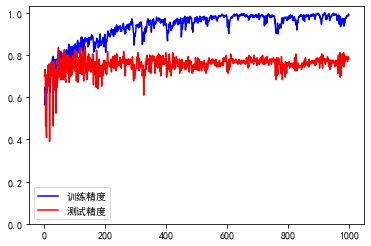

In [35]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False    # 步骤二（解决坐标轴负数的负号显示问题）
# 训练精度与测试精度的对比图：
plt.plot( history.epoch, history.history.get('acc'), c = 'b', label = '训练精度' )
plt.plot( history.epoch, history.history.get('val_acc'), c = 'r', label = '测试精度' )
plt.ylim( ymin=0 )
plt.legend()

# 过拟合

“训练精度”与“测试精度”之间的差距开始拉大，且没有缩小之间差距的趋势时，网络就已经过拟合了。

神经网络有极强的“拟合数据”的能力，即对“给定的数据”的数据有非常强的拟合逼近功能！

但是一味的重视“对原数据一丝不差”的逼近，带来的副作用自然就是泛化能力减弱！

一句话；训练精度用处不大，我们最关注、最后要的只是“测试精度”！！！